In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visual defaults (clean, readable)
sns.set(style="whitegrid")
plt.rcParams["figure.dpi"] = 100


In [28]:
# Load the dataset
df = pd.read_csv("scores_data.csv")

# Basic inspection of given dataset
print(df.head())
print(df.info())

# Clean column names for error handling
df.columns = df.columns.str.strip()

# Check the structural correctness of the file
expected_cols = {"Batch", "User_ID", "Score"}
assert expected_cols.issubset(df.columns), f"Unexpected columns found: {df.columns.tolist()}"



       Batch  User_ID     Score   
0  AI_ELITE_7  uid_149       6 / 7
1  AI_ELITE_7  uid_148       6 / 7
2  AI_ELITE_7  uid_147       7 / 7
3  AI_ELITE_7  uid_146       7 / 7
4  AI_ELITE_7  uid_145       4 / 7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB
None


In [19]:
# Convert Score from 'x / 7' string format to numeric value for analysis

df["Score"] = (
    df["Score"]
    .astype(str)
    .str.split("/", expand=True)[0]
    .str.strip()
    .astype(int)
)


In [14]:
# Clean column names
df.columns = df.columns.str.strip()

# Convert Score from 'x / 7' to integer x
df["Score"] = (
    df["Score"]
    .astype(str)
    .str.split("/", expand=True)[0]
    .str.strip()
    .astype(int)
)

# Validate structure
expected_cols = {"Batch", "User_ID", "Score"}
assert expected_cols.issubset(df.columns), f"Unexpected columns: {df.columns.tolist()}"

# Validate score range
assert df["Score"].between(0, 7).all(), "Score values outside expected range (0–7)"


In [27]:
# Validate number of unique students per batch
unique_students = df.drop_duplicates(subset="User_ID")

student_count_per_batch = (
    unique_students.groupby("Batch")["User_ID"]
    .nunique()
)

print("Unique student count per batch:")
print(student_count_per_batch)

print("\nTotal unique students:", unique_students["User_ID"].nunique())


Unique student count per batch:
Batch
AI_ELITE_4    48
AI_ELITE_6    48
AI_ELITE_7    53
Name: User_ID, dtype: int64

Total unique students: 149


In [15]:
# Summary of given dataset
batch_summary = (
    df.groupby("Batch")["Score"]
    .agg(
        count="count",
        mean="mean",
        median="median",
        std="std",
        min="min",
        max="max"
    )
    .round(2)
)

batch_summary


,count,mean,median,std,min,max
Batch,,,,,,
AI_ELITE_4,48,3.79,4.0,1.44,0,7
AI_ELITE_6,48,4.23,4.0,1.64,0,7
AI_ELITE_7,53,5.06,5.0,1.45,2,7


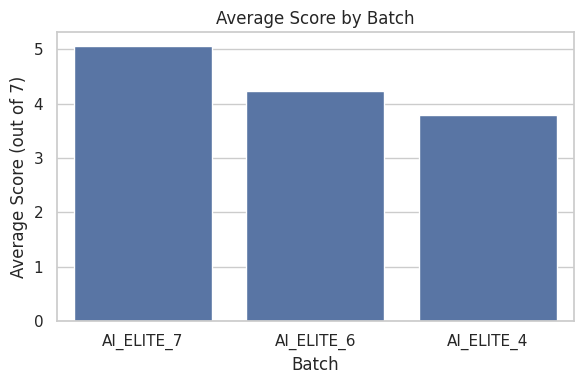

In [16]:
# Visualization of the given dataset to ensure understanding of score distribution across batches
plt.figure(figsize=(6, 4))

sns.barplot(
    data=df,
    x="Batch",
    y="Score",
    estimator=np.mean,
    errorbar=None
)

plt.title("Average Score by Batch")
plt.xlabel("Batch")
plt.ylabel("Average Score (out of 7)")
plt.tight_layout()
plt.show()


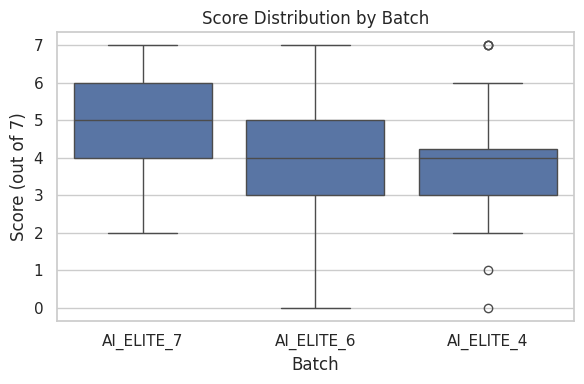

In [17]:
# Variations in a batch
plt.figure(figsize=(6, 4))

sns.boxplot(
    data=df,
    x="Batch",
    y="Score"
)

plt.title("Score Distribution by Batch")
plt.xlabel("Batch")
plt.ylabel("Score (out of 7)")
plt.tight_layout()
plt.show()


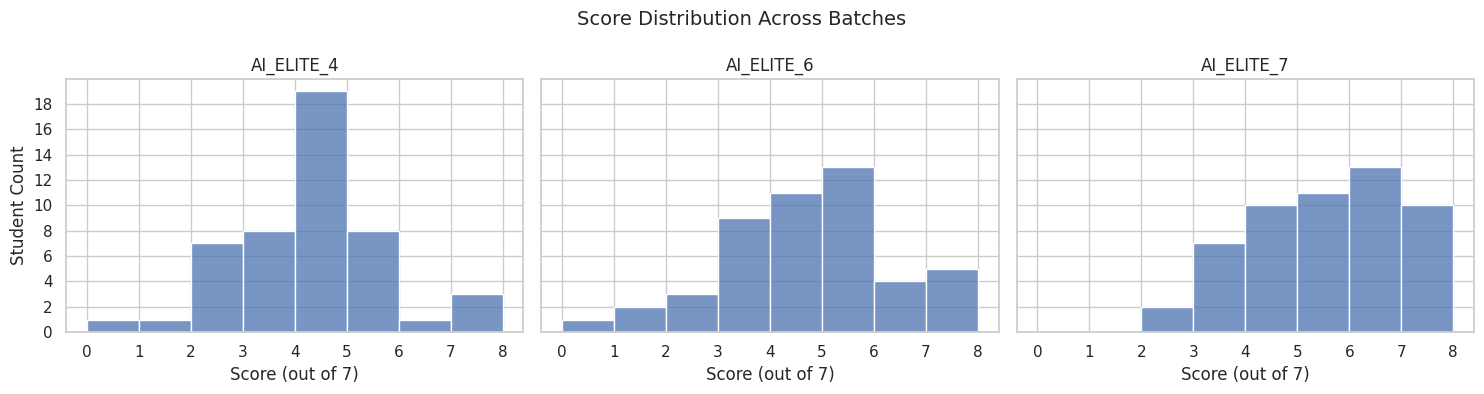

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

batches = sorted(df["Batch"].unique())
fig, axes = plt.subplots(1, len(batches), figsize=(15, 4), sharey=True)

for ax, batch in zip(axes, batches):
    sns.histplot(
        df[df["Batch"] == batch]["Score"],
        bins=range(0, 9),
        kde=False,
        ax=ax
    )

    ax.set_title(batch)
    ax.set_xlabel("Score (out of 7)")
    ax.set_ylabel("Student Count")
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.suptitle("Score Distribution Across Batches", fontsize=14)
plt.tight_layout()
plt.show()


In [23]:
print("Batch-wise Summary Statistics:\n")
print(batch_summary)
print("\nKey Insights:\n")

best_batch = batch_summary["mean"].idxmax()
weakest_batch = batch_summary["mean"].idxmin()
most_variable_batch = batch_summary["std"].idxmax()

print(f"• {best_batch} shows the highest average performance, indicating the strongest overall batch.")
print(f"• {weakest_batch} has the lowest average score, suggesting comparatively weaker performance.")
print(f"• {most_variable_batch} exhibits the highest score variability, indicating mixed performance levels within the batch.")

for batch in batch_summary.index:
    if batch_summary.loc[batch, "std"] < batch_summary["std"].mean():
        print(f"• {batch} demonstrates relatively consistent performance across students.")


Batch-wise Summary Statistics:

            count  mean  median   std  min  max
Batch                                          
AI_ELITE_4     48  3.79     4.0  1.44    0    7
AI_ELITE_6     48  4.23     4.0  1.64    0    7
AI_ELITE_7     53  5.06     5.0  1.45    2    7

Key Insights:

• AI_ELITE_7 shows the highest average performance, indicating the strongest overall batch.
• AI_ELITE_4 has the lowest average score, suggesting comparatively weaker performance.
• AI_ELITE_6 exhibits the highest score variability, indicating mixed performance levels within the batch.
• AI_ELITE_4 demonstrates relatively consistent performance across students.
• AI_ELITE_7 demonstrates relatively consistent performance across students.


# ***Final Verdict***

*Based on scores_data.csv, the dataset contains 149 unique students after removing duplicate entries.*

**AI_ELITE_4 and AI_ELITE_6 each consist of 48 students, while AI_ELITE_7 has 53 students, making the batch sizes broadly comparable.**

* **AI_ELITE_7** demonstrates the strongest overall performance, with scores largely concentrated in the higher range (5–7 out of 7) and relatively consistent performance across students.

* **AI_ELITE_6** shows mixed performance, with both high and very low scores, indicating higher variability within the batch.

* **AI_ELITE_4** underperforms relative to the other batches, with most scores clustered in the mid-to-lower range, suggesting the need for additional academic support.


*The visualisations support these insights: boxplots and histograms illustrate score distribution within each batch, where histogram bar heights represent the number of students achieving specific scores rather than total batch size.*

**Images of Visualised data**


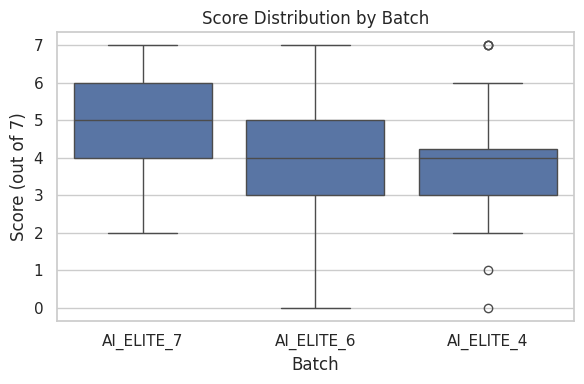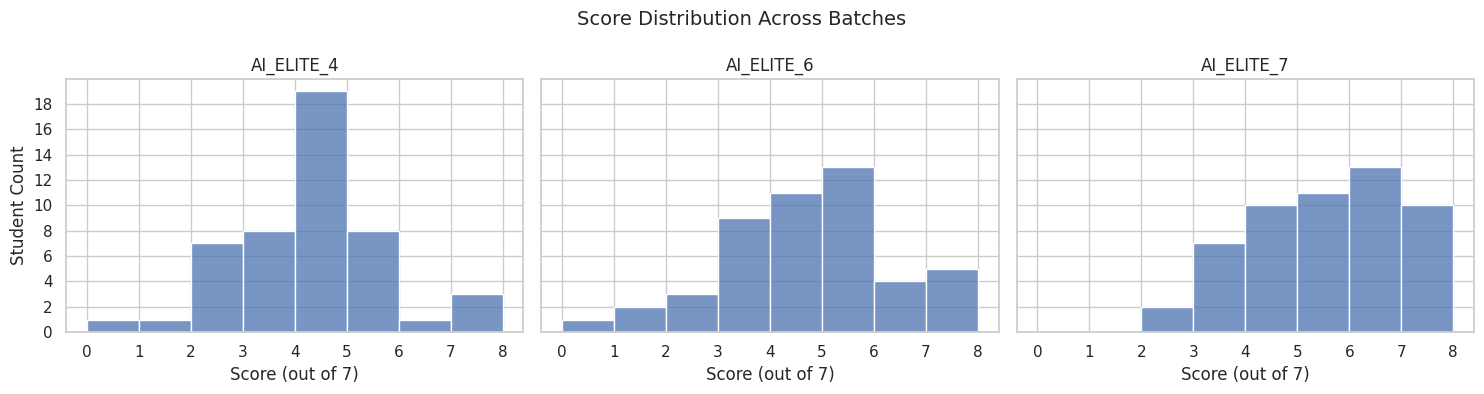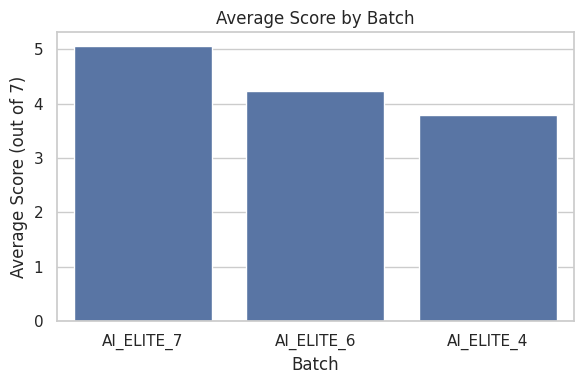